# TP1-Image Transformations and Morphological Operations

** Centrale Nantes **

** Prof. Diana Mateus **

Participants: Chaitanya VIRIYALA

## 1. Preparation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random
import skimage.exposure as exposure
#assignment of 

### 1.2. Read and display the images in a folder 

Download and unzip the images folder.  Loop over the images and show them on the screen. 


360
500
673
506
2112
2816
2112
2816
2112
2816
356
620
443
666
167
250
897
590
144
140
480
640
150
112
479
639
400
400
393
443


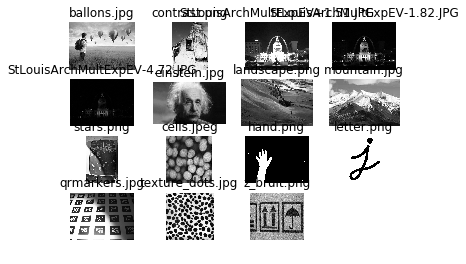

In [2]:
IMDIR = "./images" #"/Replace/With/Your/Filepath"
           
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being shown
            # print(filename)
            #fig=plt.figure(figsize=(10,4))
            # read the image 
            im = io.imread(f,as_gray=True)
            height=im.shape[0]
            width=im.shape[1]
            print(height)
            print(width)
            # display images
            plt.subplot(4,4,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()



### 1.3 Size and color space conversion
**a)** Create a function 
```python
def rgb2gray(input_im): 
```
That takes as an input a color image and gives as result a grayscale image. **Hint:** The input should be a color image, use the perceptually optimized weighted sum of color channels to compute the approximated luminance. 

**b)** Create a function

```python
def downsample(input_im): 
```
that receives a grayscale image and returns the same image resampled to half its resolution, that is, with half the number of rows and half the number of columns of the original. **Hint:** use slicing. 

**c)** Create a function

```python
def gray2onebpp(input_im): 
```
that receives a grayscale image and converts it to a binary output. **Hint:** To do so threshold the image intensity values. 

**d)** Apply the created functions to the ```ballons.jpg``` image. To display the results use ```subplot``` putting the original and resultant images side by side. Print the size of the images on the title of the subfigures using the ```.shape``` method.


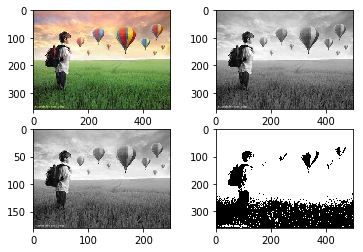

In [3]:
f = './ballons.jpg'
def rgb2gray(input_im):
    r,g,b=input_im[:,:,0],input_im[:,:,1],input_im[:,:,2]
    gray=0.2989*r+0.5870*g+0.1140*b
    
    return gray
im = io.imread(f)
imgray=rgb2gray(im.copy())
plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(imgray, cmap='gray')

def downsample(input_image):
    a=input_image[::2,::2]
    return a
imd=downsample(imgray.copy())
plt.subplot(2,2,3)
plt.imshow(imd,cmap='gray')
    
def gray2onebpp(input_im):
    threshold=100
    input_im[np.where(input_im<threshold)]=0
    input_im[np.where(input_im>threshold)]=1
    return input_im
img=gray2onebpp(imgray.copy())
plt.subplot(2,2,4)
plt.imshow(img, cmap='gray')

# 2. Intensity transformations and Histograms

### 2.1 Image histograms and global measures


**a)** Write a function that measures the luminance and contrast.

**b)** Create a function to compute and visualize the histogram of an image.

**Hint:** Use the provided ``image_histogram`` function

**c)** Create a function that recieves an image, shuffles its pixels and returns the shuffled image.

**Hint:** Look at and explain the provided ``shuffle_image`` function

**d)** Loop over the images inside the``exposure`` folder and apply the shuffling function. For each image display in a single line using subplots ```plt.subplot`` :
    - first column: the original 
    - second column: the shuffled image 
    - thrid column: the histogram of the original image
    - fourth column: the histogram of the shuffled image

Also print the computed luminance, contrast and dynamic range values.

**e)** Explain the results of comparing the histograms of the original and shuffled images

<Figure size 432x288 with 0 Axes>

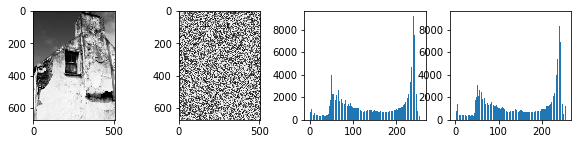

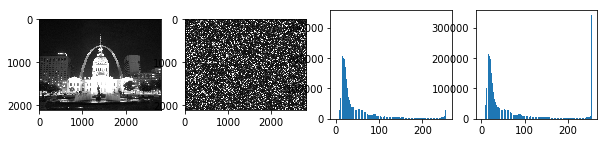

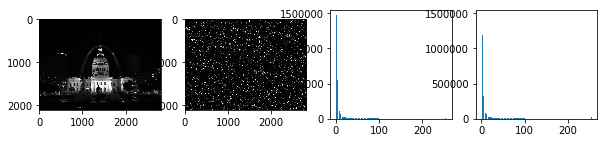

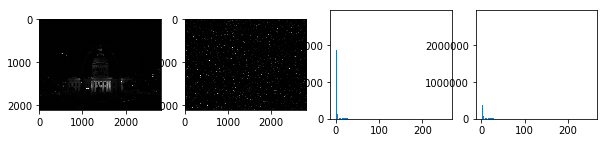

In [9]:
IMDIR = './images/exposure/'

def global_measures(input_image):
    ima=rgb2gray(input_image)
    luminance=ima.mean()
    maxi=ima.max()
    mini=ima.min()
    contrast=(maxi-mini)/(maxi+mini)
    return luminance, contrast
def image_histogram(input_image):
    hist, bin_limits = np.histogram(input_image, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    plt.bar(bin_centers,hist)
    return bin_centers,hist
def shuffle_image(input_image):
    im_shuffle = input_image.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, input_image.shape)
    return im_shuffle

           
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            fig=plt.figure(figsize=(10,2))
            plt.subplot(1,4,1)
            im1=io.imread(f,as_gray=True)
            
            if len(im1.shape)>2:
                im1=rgb2gray(im1)
            plt.imshow(im1,cmap='gray')
            plt.subplot(1,4,2)
            ims1=shuffle_image(im1)
            plt.imshow(ims1,cmap='gray')
            plt.subplot(1,4,3)
            
            image_histogram(255*im1)
            
            plt.subplot(1,4,4)
            #fig=plt.figure(figsize=(10,2))
            image_histogram(255*ims1)
            

plt.show()


### 2.2 Graylevel transforms and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the 
```
histograms
``` 
folder.

**a)** Implement a generic linear transformation parameterized by a and b such that its transfer function has the form ```f(x) = a x + b``` 

**b)** Assign values to ```a``` and ```b``` such that the image grayscale is *inverted*

**c)** Contrast stretching: piecewise linear transfer function with saturation:

```Hint``` you can use the ```exposure.resale_intensity``` function, in which case explain how it works

**d)** Histogram equalization


```Hint``` you can use the ``exposure.equalize_hist``` function, in which case explain how it works

**(e)** Loop over the images in the ``histograms`` folder and display the results for each image with subplot in two lines:
- In the top row show the original and the transformed images.
- In the bottom row display the  histograms of the original and transformed images. 

**Hints** 
- set the horizontal limits fo the histograms to ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits. 



<Figure size 432x288 with 0 Axes>

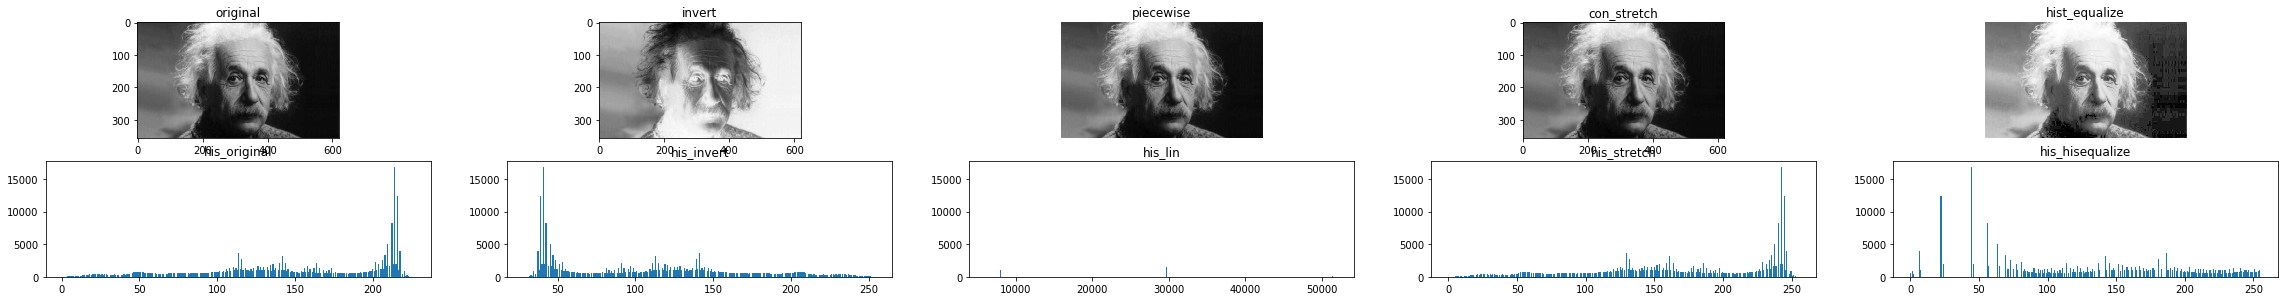

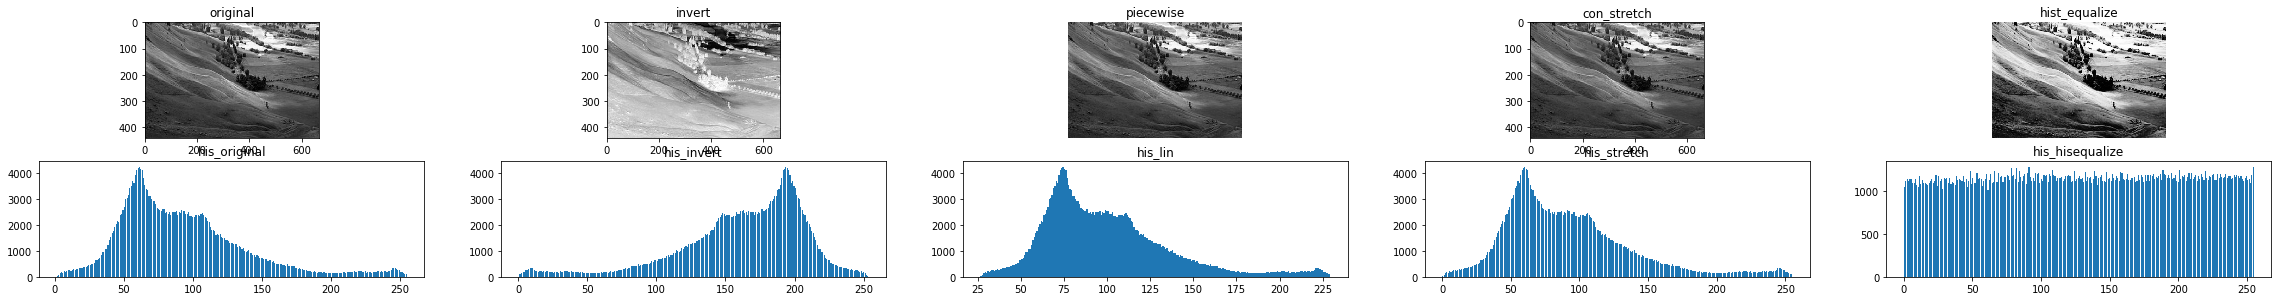

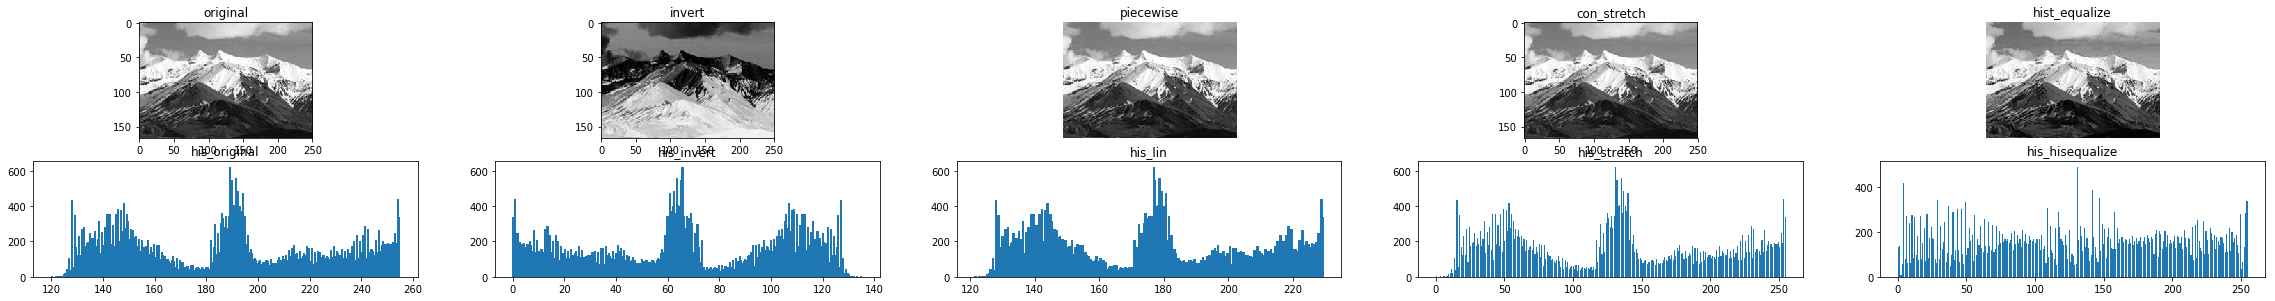

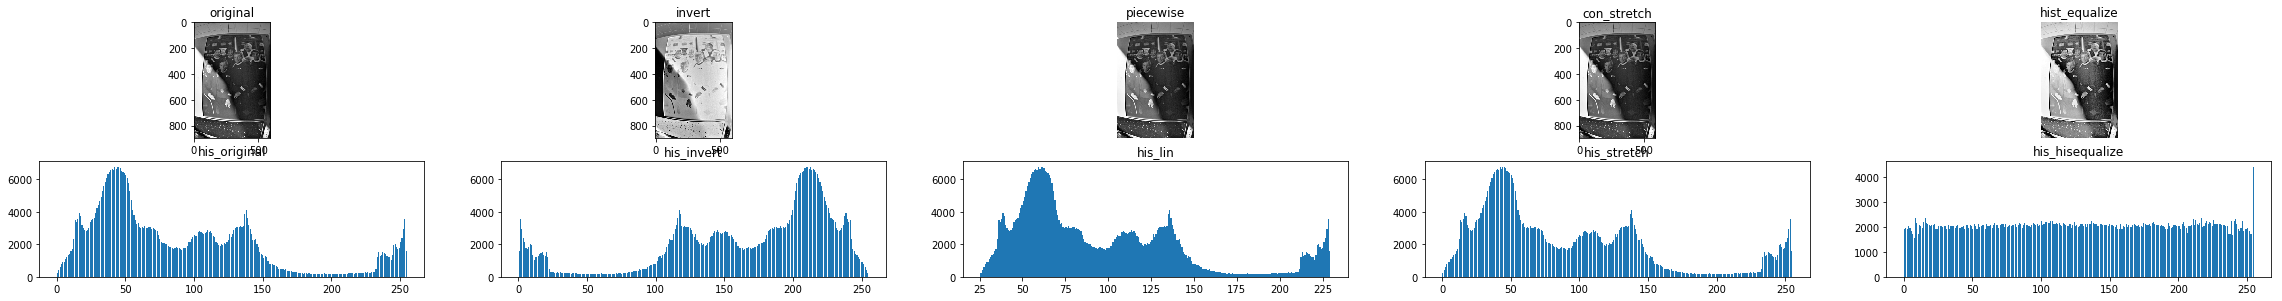

In [13]:
IMDIR = "./images/histograms"

def invert(source):
    a=1-source
    return a 
    

def linear (source, a, b):
    after_lin=source*a+b
    return after_lin

def contrast_saturate(source):
    lin=exposure.rescale_intensity(source)
    hist=exposure.equalize_hist(source)
    return  lin,hist
fig=plt.figure()

im_counter = 1
i=1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_gray=True)
            if len(im.shape)==3:
                im=rgb2gray(im)
            
            fig=plt.figure(figsize=(40,20))
            
            plt.subplot(8,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title("original")
            #plt.axis('off')
            im_counter +=1 
            
            plt.subplot(8,5,im_counter)
            im_inv=invert(im)
            plt.imshow(im_inv,cmap='gray')
            plt.title("invert")
            #plt.axis('off')
            im_counter +=1 
            
            
            plt.subplot(8,5,im_counter)
            lin=linear(im,0.8,0.1)
            plt.imshow(lin,cmap='gray')
            plt.title("piecewise")
            plt.axis('off')
            im_counter +=1 
            
            stretch_lin, stretch_hist=contrast_saturate(im)
            
            plt.subplot(8,5,im_counter)
            plt.imshow(stretch_lin,cmap='gray')
            plt.title("con_stretch")
            #plt.axis('off')
            im_counter +=1 
            
            plt.subplot(8,5,im_counter)
            plt.imshow(stretch_hist,cmap='gray')
            plt.title("hist_equalize")
            plt.axis('off')
            im_counter +=1 
            
            plt.subplot(8,5,im_counter)
            image_histogram(255*im)
            plt.title("his_original")
            #plt.axis('off')
            im_counter +=1
            
            plt.subplot(8,5,im_counter)
            image_histogram(255*im_inv)
            plt.title("his_invert")
            #plt.axis('off')
            im_counter +=1
            
            plt.subplot(8,5,im_counter)
            image_histogram(255*lin)
            plt.title("his_lin")
            #plt.axis('off')
            im_counter +=1
            
            plt.subplot(8,5,im_counter)
            image_histogram(255*stretch_lin)
            plt.title("his_stretch")
            #plt.axis('off')
            im_counter +=1
            
            plt.subplot(8,5,im_counter)
            image_histogram(255*stretch_hist)
            plt.title("his_hisequalize")
            #plt.axis('off')
            im_counter +=1
plt.show()

## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale: 

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

Apply the filters to the original gray scale images. Explain the results 

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


<Figure size 432x288 with 0 Axes>

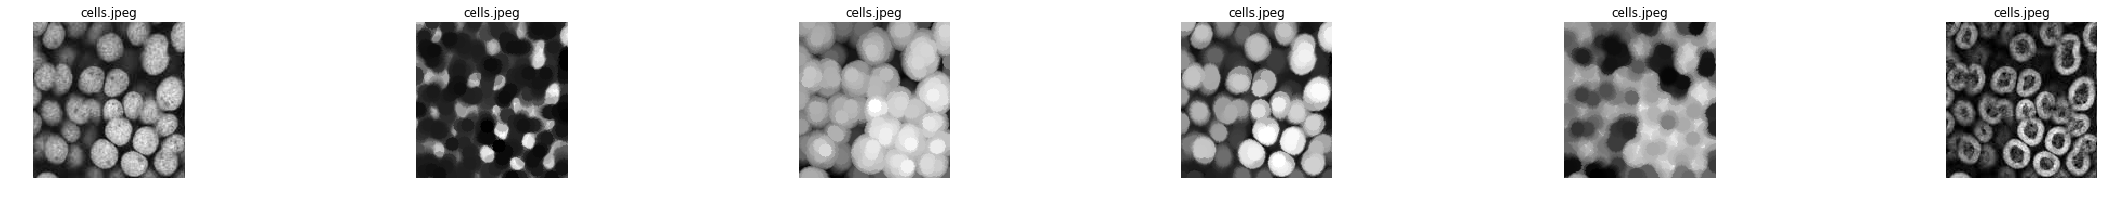

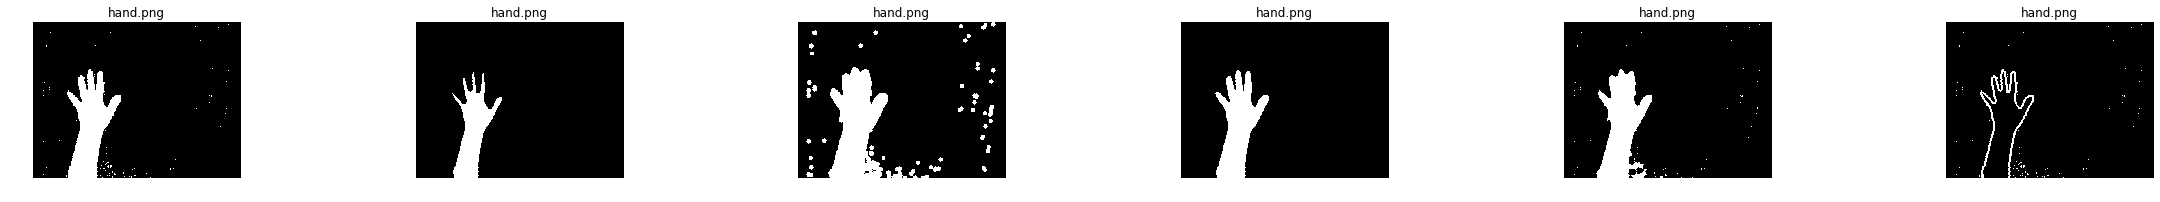

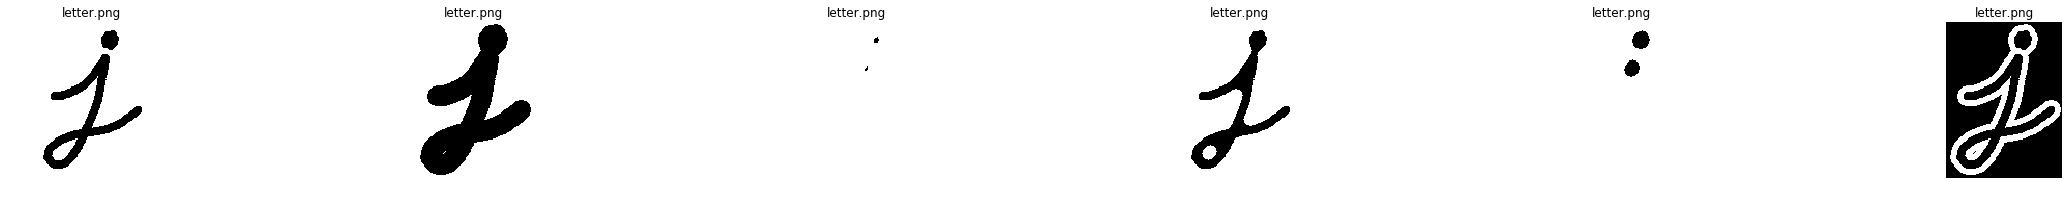

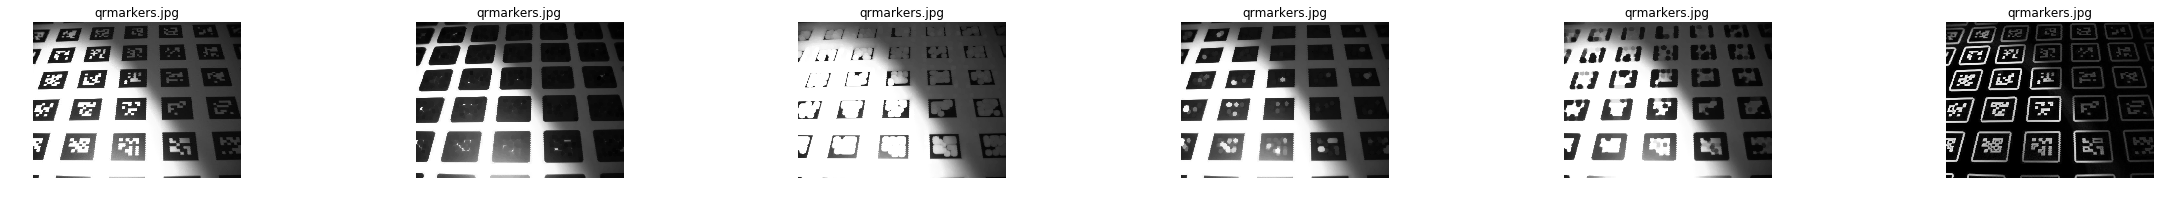

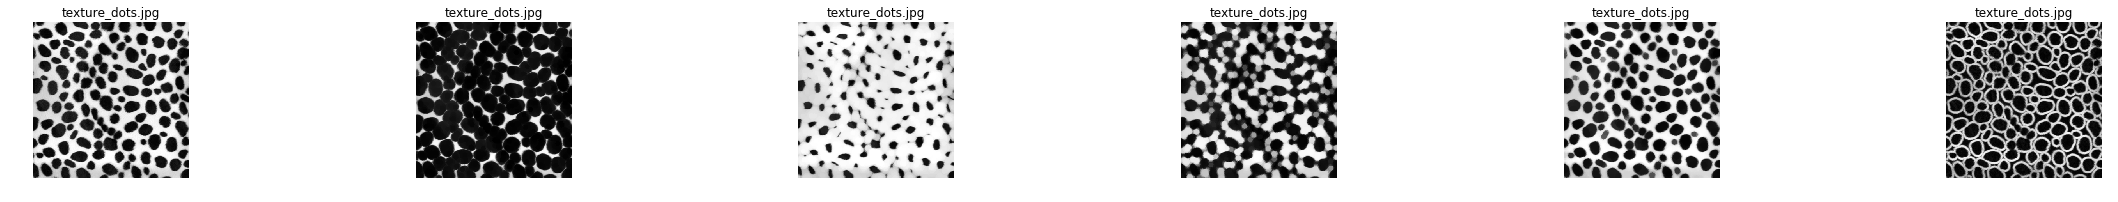

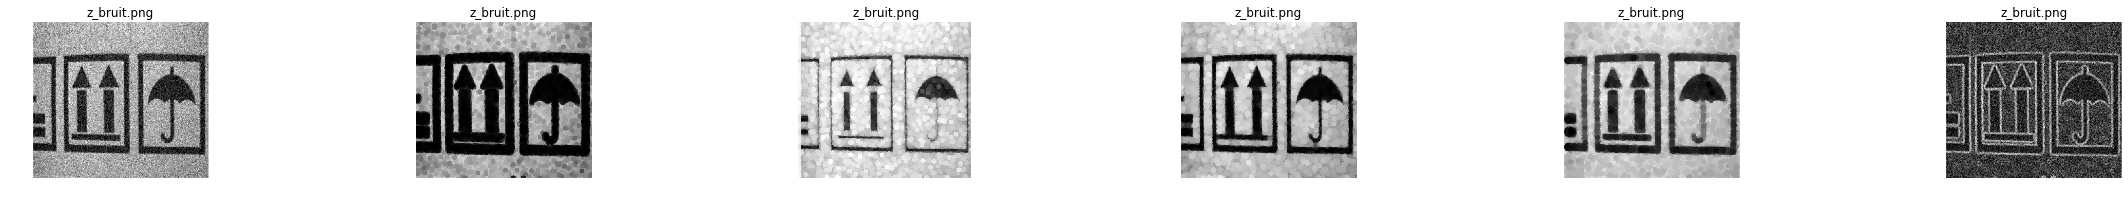

In [11]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
IMDIR = "./images/morphology"
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_gray=True)
            if len(im.shape)>2:
                im=rgb2gray(im)
                
            
            selem = disk(6)
            eroded_im = erosion(im, selem)
            dilate_im = dilation(im,selem)
            opening_im = opening(im,selem)
            closing_im = closing(im,selem)
            border_im=im - eroded_im
            
            fig=plt.figure(figsize=(40,20))
            
            plt.subplot(6,6,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 
            
            plt.subplot(6,6,im_counter)
            plt.imshow(eroded_im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 
            
            plt.subplot(6,6,im_counter)
            plt.imshow(dilate_im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1
            
            plt.subplot(6,6,im_counter)
            plt.imshow(opening_im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1
            
            plt.subplot(6,6,im_counter)
            plt.imshow(closing_im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1
            
            plt.subplot(6,6,im_counter)
            plt.imshow(border_im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1
plt.show()




**BONUS (2pt for homework)** implement your own erosion and dilation functions, and compared them with the in-built functions.

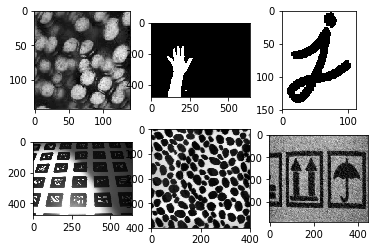

In [4]:
from skimage.morphology import disk
IMDIR = "./images/morphology"
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_gray=True)
            if len(im.shape)>2:
                im=rgb2gray(im)
            selem = disk(6)
            m,n=im.shape
            img=im.copy()
            for i in range(0,m-1):
                for j in range(0,n-1):
                    for k in range(max(0,i-6),min(i+6,m-1)):
                        for l in range(max(0,j-6),min(j+6,n-1)):
                            
                            if (im[k,l]<=im[i,j]) and ((k-i)**2 + (l-j)**2 <= 6**2):
                                img[i,j]=im[k,l]
            plt.subplot(2,3,im_counter)        
            plt.imshow(img, cmap='gray')
            im_counter +=1
plt.show()

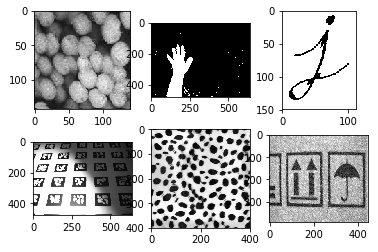

In [8]:
#from skimage.morphology import disk
IMDIR = "./images/morphology"
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_gray=True)
            if len(im.shape)>2:
                im=rgb2gray(im)
            
            m,n=im.shape
            img=im.copy()
            for i in range(0,m-1):
                for j in range(0,n-1):
                    for k in range(max(0,i-6),min(i+6,m-1)):
                        for l in range(max(0,j-6),min(j+6,n-1)):
                            
                            if (im[k,l]>=im[i,j]) and ((k-i)**2 + (l-j)**2 <= 6**2):
                                img[i,j]=im[k,l]
            plt.subplot(2,3,im_counter)        
            plt.imshow(img, cmap='gray')
            im_counter +=1
plt.show()